In [300]:
import tensorflow as tf
import json
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [312]:
def loadMaps():
    with open('maps1.json', 'r') as f:
        a = json.load(f)
    return copy.deepcopy(a)

In [313]:
maps = loadMaps()

print(maps["maps"][0])


[2, 1, 2, 0, 0, 2, 4, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0]


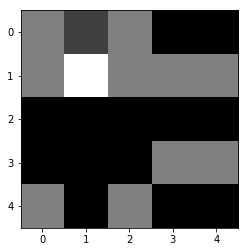

In [314]:
plt.imshow(np.array(maps["maps"][0]).reshape(5,5), cmap='gist_gray')


In [244]:
def normalize(flattened):
    for i in range(len(flattened)):
        minimum = min(flattened)
        maximum = max(flattened)
        flattened[i] = (flattened[i]-minimum)/(maximum - minimum)
        
    return flattened
        
        
        

In [245]:
normalized = []
for i in maps["maps"]:
    normalized.append(normalize(i))
print(normalized[0])

[0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.5, 0.75, 0.5, 0.5, 0.0, 0.0, 1.0, 1.0, 0.5, 0.0, 1.0]


In [246]:
# newMaps = {
#     "maps":[],
#     "moves":[]
# }

# newMaps["maps"] = normalized
# newMaps["moves"] = maps["moves"]

# def writeMaps(maps):
#     with open('normalizedMaps.json', 'w') as f:
#         a = json.dump(maps, f, separators=(',', ': '), indent=4)
# writeMaps(newMaps)

/home/milkylatte/anaconda3/envs/tf/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


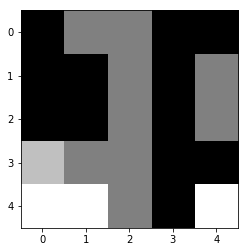

In [308]:
from sklearn.preprocessing import MinMaxScaler
import cv2
npMaps = np.array(maps["maps"])
scaler = MinMaxScaler()
hey = scaler.fit_transform(npMaps[0].reshape(5,5))

plt.imshow(np.array(normalized[0]).reshape(5,5),cmap='gist_gray')



In [248]:
from sklearn.preprocessing import OneHotEncoder

npSolution = np.array(maps["moves"]).reshape(len(maps["moves"]), 1)
onehot_encoder = OneHotEncoder(sparse=False)
encoded = onehot_encoder.fit_transform(npSolution)

print(encoded)


[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


/home/milkylatte/anaconda3/envs/tf/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_train, X_test, y_train, y_test = train_test_split(np.array(normalized), encoded, test_size=0.3, random_state = 101)

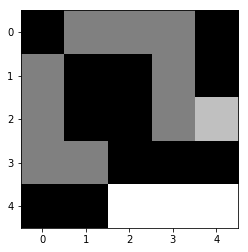

In [251]:
plt.imshow(X_train[3].reshape(5,5), cmap="gist_gray")

In [252]:
# x = tf.placeholder(tf.float32, shape=[None, 400])

In [253]:
# W = tf.Variable(tf.zeros([400, 4]))

In [254]:
# b = tf.Variable(tf.zeros([4]))

In [255]:
# y = tf.matmul(x, W) + b

In [256]:
# y_true = tf.placeholder(tf.float32, [None, 4])

In [257]:
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [258]:
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [259]:
# train = optimizer.minimize(cross_entropy)

In [260]:
# init = tf.global_variables_initializer()

In [261]:
# with tf.Session() as sess:
#     sess.run(init)
    
#     for step in range(10000):
#         i = np.random.randint(0, len(X_train)-100)
#         sess.run(train, feed_dict={x: X_train[i:i+100], y_true: y_train[i:i+100]})
        
#     matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
#     acc = tf.reduce_mean(tf.cast(matches, tf.float32))
#     print(sess.run(acc, feed_dict={x:X_test, y_true: y_test}))
        
        

In [262]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [263]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [264]:
def conv2d(x, W):
    # x --> [batch, H, W, Channels]
    # W --> [filter H, filter W, Channels IN, Channels OUT]
    
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [265]:
def max_pool_2by2(x):
    # x --> [batch, h, w, c]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [266]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W)+b)

In [267]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [268]:
x = tf.placeholder(tf.float32, shape=[None, 25])

In [269]:
y_true = tf.placeholder(tf.float32,shape=[None, 4])

In [270]:
x_image = tf.reshape(x, [-1,5,5,1])

In [271]:
convo_1 = convolutional_layer(x_image, shape=[5,5,1,25])
#convo_1_pooling = max_pool_2by2(convo_1)

In [272]:
convo_2 = convolutional_layer(convo_1, shape=[5,5,25,10])
# convo_2_pooling = max_pool_2by2(convo_2)

In [273]:
convo_2_flat = tf.reshape(convo_2,[-1,5*5*10])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024))

In [274]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

In [275]:
y_pred = normal_full_layer(full_one_dropout, 4)

In [276]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

In [277]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [278]:
init = tf.global_variables_initializer()

In [279]:
# with tf.Session() as sess:
#     sess.run(init)
    
#     for step in range(10000):
#         i = np.random.randint(0, len(X_train)-100)
#         sess.run(train, feed_dict={x: X_train[i:i+100], y_true: y_train[i:i+100]})
        
#     matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
#     acc = tf.reduce_mean(tf.cast(matches, tf.float32))
#     print(sess.run(acc, feed_dict={x:X_test, y_true: y_test}))

In [280]:
steps = 10000

with tf.Session() as sess:
    sess.run(init)
    for j in range(steps):
        i = np.random.randint(0, len(X_train)-10)

        sess.run(train, feed_dict={x:X_train[i:i+10], y_true:y_train[i:i+10], hold_prob:0.5})
        if j%100 == 0:
            print("ON STEP: {}".format(j))
            print("ACCURACY: ")
            
            matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
            acc = tf.reduce_mean(tf.cast(matches, tf.float32))
            print(sess.run(acc, feed_dict={x:X_test[:10000], y_true:y_test[:10000], hold_prob:1.0}))

ON STEP: 0
ACCURACY: 
0.24616858
ON STEP: 100
ACCURACY: 
0.25
ON STEP: 200
ACCURACY: 
0.25191572
ON STEP: 300
ACCURACY: 
0.25095785
ON STEP: 400
ACCURACY: 
0.26819924
ON STEP: 500
ACCURACY: 
0.2710728
ON STEP: 600
ACCURACY: 
0.24233717
ON STEP: 700
ACCURACY: 
0.2413793
ON STEP: 800
ACCURACY: 
0.25191572
ON STEP: 900
ACCURACY: 
0.24521072
ON STEP: 1000
ACCURACY: 
0.25766283
ON STEP: 1100
ACCURACY: 
0.25478926
ON STEP: 1200
ACCURACY: 
0.25574714
ON STEP: 1300
ACCURACY: 
0.25862068
ON STEP: 1400
ACCURACY: 
0.2605364
ON STEP: 1500
ACCURACY: 
0.27969348
ON STEP: 1600
ACCURACY: 
0.27394637
ON STEP: 1700
ACCURACY: 
0.27203065
ON STEP: 1800
ACCURACY: 
0.27873564
ON STEP: 1900
ACCURACY: 
0.28256705
ON STEP: 2000
ACCURACY: 
0.27873564
ON STEP: 2100
ACCURACY: 
0.28065133
ON STEP: 2200
ACCURACY: 
0.28448275
ON STEP: 2300
ACCURACY: 
0.28735632
ON STEP: 2400
ACCURACY: 
0.29118773
ON STEP: 2500
ACCURACY: 
0.27490422
ON STEP: 2600
ACCURACY: 
0.28448275
ON STEP: 2700
ACCURACY: 
0.28544062
ON STEP: 2800